In [ ]:
# 중간고사 

In [1]:
import pandas as pd

In [16]:
mid = pd.Series([50,48,48,48,48,48,44,44,42,40,40,36,33,32,32,30,30,26,22,22,22,20,20,20,20,20,16,16,14,12,12,10,10,8,8,8,8,6,6])
mid

0     50
1     48
2     48
3     48
4     48
5     48
6     44
7     44
8     42
9     40
10    40
11    36
12    33
13    32
14    32
15    30
16    30
17    26
18    22
19    22
20    22
21    20
22    20
23    20
24    20
25    20
26    16
27    16
28    14
29    12
30    12
31    10
32    10
33     8
34     8
35     8
36     8
37     6
38     6
dtype: int64

<AxesSubplot:>

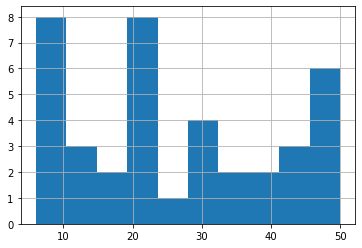

In [19]:
mid.hist()

In [18]:
mid.describe()

count    39.000000
mean     26.128205
std      14.614664
min       6.000000
25%      13.000000
50%      22.000000
75%      40.000000
max      50.000000
dtype: float64